# EDA notebook
competition : RSNA Screening Mammography Breast Cancer Detection  
url : https://www.kaggle.com/competitions/rsna-breast-cancer-detection

reference notebook : https://www.kaggle.com/code/craigmthomas/rsna-2022-eda

## 0. import and Data loading

In [1]:
!pip install -qU python-gdcm pydicom pylibjpeg
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=7e608bd96f5a47ae59606b68a5fbec38ff1241054208e721b398cf1f41d7cb30
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import os
import pydicom
import pandas as pd
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [3]:
train = pd.read_csv("../input/rsna-breast-cancer-detection/train.csv")
test = pd.read_csv("../input/rsna-breast-cancer-detection/test.csv")

print('train')
display(train)
print('test')
display(test)

train


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


test


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [4]:
print('---train---')
print(f'train.shape : {train.shape[0]}rows, {train.shape[1]}cols')
print(f'train.patient_id.nunique() : {train.patient_id.nunique()}')
print(f'train.image_id.nunique() : {train.image_id.nunique()}')
print(f'target col : cancer')
print(f'columns not in test : {set(train.columns) - set(test.columns)}')
display(train.describe(include='all'))
print(f'train missing values : ')
print(train[train.isnull()].sum())
print('')
print('---test---')
print(f'test.shape : {test.shape[0]}rows, {test.shape[1]}cols')
print(f'columns not in train : {set(test.columns)-set(train.columns)}')

---train---
train.shape : 54706rows, 14cols
train.patient_id.nunique() : 11913
train.image_id.nunique() : 54706
target col : cancer
columns not in test : {'cancer', 'density', 'difficult_negative_case', 'invasive', 'biopsy', 'BIRADS'}


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
count,54706.000000,54706.000000,5.470600e+04,54706,54706,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,29470,54706.000000,54706
unique,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2
top,NaN,NaN,NaN,R,MLO,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,False
freq,NaN,NaN,NaN,27439,27903,NaN,NaN,NaN,NaN,NaN,NaN,12651,NaN,47001
mean,1.460407,32698.865262,1.079386e+09,NaN,NaN,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,NaN,54.618378,NaN
std,0.498434,18893.861534,6.183269e+08,NaN,NaN,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,NaN,44.784800,NaN
min,1.000000,5.000000,6.849100e+04,NaN,NaN,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.000000,NaN
25%,1.000000,16481.000000,5.458153e+08,NaN,NaN,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,29.000000,NaN
50%,1.000000,32432.000000,1.082689e+09,NaN,NaN,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,49.000000,NaN
75%,2.000000,48999.000000,1.613228e+09,NaN,NaN,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,49.000000,NaN


train missing values : 
site_id                    0.0
patient_id                 0.0
image_id                   0.0
laterality                   0
view                         0
age                        0.0
cancer                     0.0
biopsy                     0.0
invasive                   0.0
BIRADS                     0.0
implant                    0.0
density                      0
machine_id                 0.0
difficult_negative_case      0
dtype: object

---test---
test.shape : 4rows, 9cols
columns not in train : {'prediction_id'}


**ここまででわかったこと**  
* trainには54706行存在しているが、患者数は11913である。１人の患者さんにつき複数のデータがある。
* trainにはtestにはないカラムが存在している。（testにもtrainにないカラムが一つ存在しているが、submit時に使用するだけで、あまり関係ない）
* testは１人の患者さんの４枚の画像からガンがあるかどうかを予測する。２つのview（？）で左右の胸の画像がある。よって計４画像
* 欠損値はない
  
**これからやること**
* 14つの特徴について、データの分布やそのデータの意味を理解する。
* testにないカラムも調べ、予測に使えるかどうかを考える。


## 1. image data

In [5]:
dcm_count = 0
for cdir, dirs, files in os.walk('../input/rsna-breast-cancer-detection/train_images'):
    for f in files:
        if f.split('.')[1] == 'dcm':
            dcm_count += 1
print(f'number of images .dcm : {dcm_count}')
print(f'number of images : {train.image_id.nunique()}')

number of images .dcm : 54706
number of images : 54706


すべての画像は.dcm形式であると考えられる。そもそも.dcm形式とはなんなのか  
  
**.DCM**  
>  DCMの画像フォーマットもDICOM画像フォーマットを開発し全国電機製造業者協会（NEMA）によって開発された。 NEMAは、DICOM医用画像保管、流通および分析のための標準仕様としてDCM形式を開発しました。 DCMフォーマットは、超音波画像、MRI（磁気共鳴画像）などのうちのCT（コンピュータ断層撮影）スキャンシートを含むことができる画像を保存するために使用される。これらDCMファイルの内容は、患者の氏名等の患者の詳細、および他の関連する医療データをも含むことができる。https://www.reviversoft.com/ja/file-extensions/dcm  

今回はMRI画像であるため、.dcm形式の画像である。また、.dcmには患者の氏名等の患者の詳細、およびほかの関連する医療データを含んでいるため、特徴として使える可能性がある。  
pythonで.dcmを扱うにはpydicomライブラリが必要である。

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.792591'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

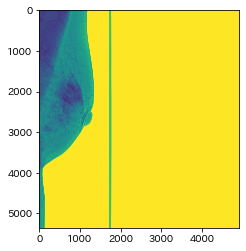

In [6]:
file = pydicom.dcmread('/kaggle/input/rsna-breast-cancer-detection/train_images/10006/1459541791.dcm')
print(file)
img = file.pixel_array
plt.imshow(img)
plt.show()

In [7]:
dicom_df = pd.read_csv('/kaggle/input/rsna-dicom-csv/dicom.csv').drop(columns="Unnamed: 0")
dicom_df.head()

,patient_id,image_id,PixelIntensityRelationship,ExposureControlMode,WindowCenter,WindowWidth,LossyImageCompression,ContentDate,Rows,RescaleSlope,PixelSpacing,SeriesInstanceUID,ContentTime,BodyPartThickness,HighBit,PixelPaddingValue,ExposureControlModeDescription,BitsStored,RescaleType,BitsAllocated,InstanceNumber,RescaleIntercept,StudyInstanceUID,PartialView,PixelRepresentation,PatientID,Columns,PhotometricInterpretation,CompressionForce,PixelIntensityRelationshipSign,ImageLaterality,SamplesPerPixel,VOILUTFunction,SOPInstanceUID
0,10006,462822612,LOG,NaN,"[1802.310000, 1802.310000, 2020.704000, 1583.9...","[1091.970000, 1091.970000, 1091.970000, 1091.9...",0.0,20221118,5355,1.0,NaN,1.2.840.10009.1.2.3.10006.1,183901.561976,NaN,15,3204.0,NaN,16,US,16,462822612,0.0,1.2.840.10009.1.2.3.10006,NO,0,10006,4915,MONOCHROME1,NaN,1.0,L,1,SIGMOID,1.2.840.10009.1.2.3.10006.1.462822612
1,10006,1459541791,LOG,NaN,"[1802.310000, 1802.310000, 2020.704000, 1583.9...","[1091.970000, 1091.970000, 1091.970000, 1091.9...",0.0,20221118,5355,1.0,NaN,1.2.840.10009.1.2.3.10006.1,183901.792591,NaN,15,3044.0,NaN,16,US,16,1459541791,0.0,1.2.840.10009.1.2.3.10006,NO,0,10006,4915,MONOCHROME1,NaN,1.0,L,1,SIGMOID,1.2.840.10009.1.2.3.10006.1.1459541791
2,10006,1864590858,LOG,NaN,"[1802.310000, 1802.310000, 2020.704000, 1583.9...","[1091.970000, 1091.970000, 1091.970000, 1091.9...",0.0,20221118,5355,1.0,NaN,1.2.840.10009.1.2.3.10006.1,183901.986648,NaN,15,3076.0,NaN,16,US,16,1864590858,0.0,1.2.840.10009.1.2.3.10006,NO,0,10006,4915,MONOCHROME1,NaN,1.0,R,1,SIGMOID,1.2.840.10009.1.2.3.10006.1.1864590858
3,10006,1874946579,LOG,NaN,"[1802.310000, 1802.310000, 2020.704000, 1583.9...","[1091.970000, 1091.970000, 1091.970000, 1091.9...",0.0,20221118,5355,1.0,NaN,1.2.840.10009.1.2.3.10006.1,183902.142082,NaN,15,3044.0,NaN,16,US,16,1874946579,0.0,1.2.840.10009.1.2.3.10006,NO,0,10006,4915,MONOCHROME1,NaN,1.0,R,1,SIGMOID,1.2.840.10009.1.2.3.10006.1.1874946579
4,10011,220375232,LOG,NaN,2048,4096,0.0,20221118,2776,1.0,NaN,1.2.840.10009.1.2.3.10011.1,183903.112791,NaN,11,0.0,NaN,12,US,16,220375232,0.0,1.2.840.10009.1.2.3.10011,NO,0,10011,2082,MONOCHROME2,NaN,1.0,L,1,NaN,1.2.840.10009.1.2.3.10011.1.220375232


途中

## 2. train feature
trainカラムについてそれぞれ見ていく

In [8]:
train.corr()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
site_id,1.000000,-0.001236,-0.000508,0.128149,-0.009975,-0.121886,-0.002603,-0.430987,-0.153870,-0.446908,-0.090292
patient_id,-0.001236,1.000000,0.001124,-0.011810,-0.003253,-0.005848,-0.003762,0.011424,-0.004338,-0.002665,-0.004221
image_id,-0.000508,0.001124,1.000000,-0.007483,0.000223,0.001518,0.002657,-0.009201,0.004602,-0.006546,0.009850
age,0.128149,-0.011810,-0.007483,1.000000,0.075155,0.010167,0.068674,0.048258,-0.069599,-0.050258,-0.104224
cancer,-0.009975,-0.003253,0.000223,0.075155,1.000000,0.613872,0.837815,-0.210718,-0.014311,-0.024888,-0.059541
biopsy,-0.121886,-0.005848,0.001518,0.010167,0.613872,1.000000,0.514311,-0.410620,-0.002569,-0.017580,0.323064
invasive,-0.002603,-0.003762,0.002657,0.068674,0.837815,0.514311,1.000000,-0.172750,-0.008443,-0.018867,-0.049884
BIRADS,-0.430987,0.011424,-0.009201,0.048258,-0.210718,-0.410620,-0.172750,1.000000,0.025262,0.181352,-0.833624
implant,-0.153870,-0.004338,0.004602,-0.069599,-0.014311,-0.002569,-0.008443,0.025262,1.000000,0.018106,0.021065
machine_id,-0.446908,-0.002665,-0.006546,-0.050258,-0.024888,-0.017580,-0.018867,0.181352,0.018106,1.000000,0.000682


### 2.1 site_id

`site_id` - ID code for the source hospital.(ソース病院の ID コード。)
* 病院によってがん発見率が変わる？
* 特徴として入れるのはよくない（のか？）

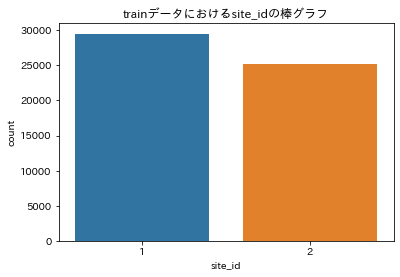

,0,1,sum,1/sum
site_id_1,28855,664,29519,0.022494
site_id_2,24693,494,25187,0.019613


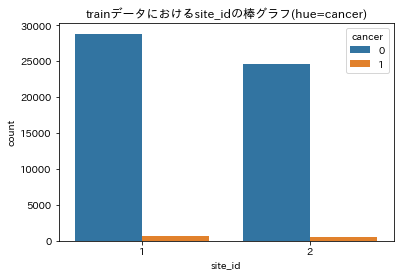

In [9]:
p = sns.countplot(x='site_id', data=train)
p.set(title='trainデータにおけるsite_idの棒グラフ')
plt.show()

_ = train.groupby('site_id')['cancer'].value_counts()
tmp = pd.DataFrame(index=['site_id_1', 'site_id_2'], data={'0': [_[1][0], _[2][0]], '1': [_[1][1], _[2][1]] })
tmp['sum'] = tmp['0'] + tmp['1']
tmp['1/sum'] = tmp['1'] / tmp['sum']
display(tmp)

p = sns.countplot(x='site_id', data=train, hue='cancer')
p.set(title='trainデータにおけるsite_idの棒グラフ(hue=cancer)')
plt.show()

`site_id`はとりあえず無視する。  
見た感じ、どちらの病院のほうががん発見率が高い、といったことはない。

### 2.2 patient_id, image_id

`patient_id, image_id`に関してはただのIDであるため無視

### 2.3 laterality

`laterality` - Whether the image is of the left or right breast.（画像が左胸か右胸か）

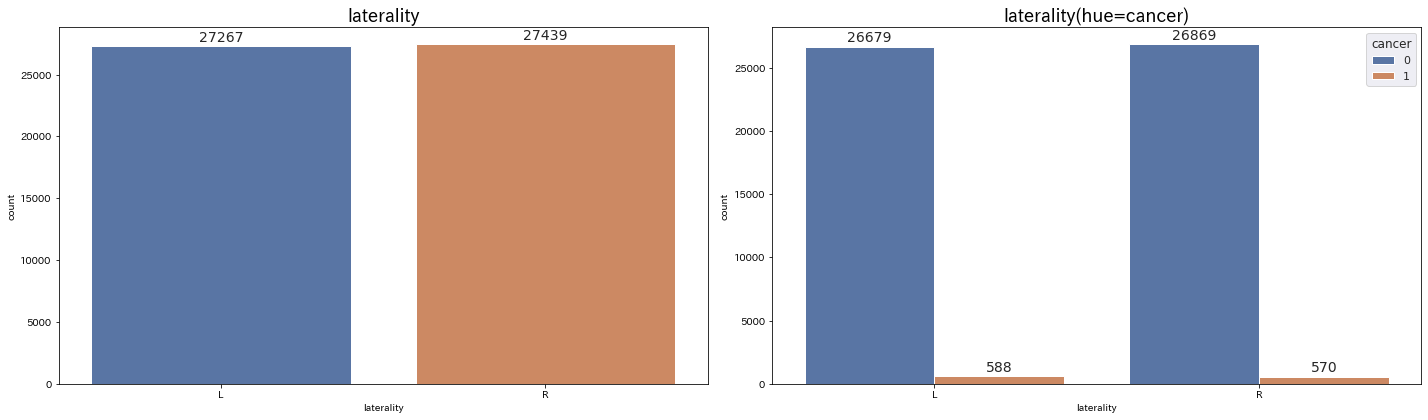

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize =(20,6), tight_layout=True)
sns.set()
# axs = axs.flatten()

sns.countplot(x='laterality', data=train, ax=axs[0])
axs[0].set_title('laterality', fontsize=18)

for p in axs[0].patches:
    axs[0].annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize = 14)

sns.countplot(x='laterality', data=train, hue='cancer', ax=axs[1])
axs[1].set_title('laterality(hue=cancer)', fontsize=18)
for q in axs[1].patches:
    axs[1].annotate(format(q.get_height()), 
                   (q.get_x() + q.get_width() / 2., 
                    q.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize = 14)
plt.show()



左右でがんの発見に相関はなさそう